<img src='images/gdd-logo.png' width='300px' align='right' style="padding: 15px">

# Pandas

Let's start exploring datasets. For this we are going to use the `pandas` library.

In this section we will cover:

- [About the Data](#data)
- [Importing the library](#import)
- [Exploratory analysis](#exploratory)
- [Data Cleaning](#cleaning)
- [In-depth Analysis](#ida)
- [Plotting with `.plot` & `seaborn`](#vis)


## About the data - Palmer Penguins

![](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/logo.png)


The data was collected and made available by Dr. Kristen Gorman and the Palmer Station, Antartica LTER. The goal of the dataset is to provide a great dataset for data exploration, visualisation and use of the scikit-learn API. 

<a id='import'></a>

## Importing

Pandas is a specialised package that allows us to work with databases using python.

First we need to import the package.

In [ ]:
import pandas as pd

<a id='exploratory'></a>

## Exploratory analysis

In [ ]:
# Create data to use
penguins = pd.read_csv('data/penguins_raw.csv')

In [ ]:
# look at the top 5 rows
penguins.head()

In [ ]:
penguins.groupby(['species','island']).count()

In [ ]:
penguins.groupby('island').mean().drop('body_mass_g',axis=1).plot(kind='bar')

In [ ]:
# get the shape of the data
penguins.shape

In [ ]:
# get stats on the numeric columns - where's R and VBA?
penguins.describe()

In [ ]:
# check the data types of each column
penguins.dtypes

In [ ]:
# Count the number of species
penguins['species'].value_counts()

In [ ]:
# find the min and max of the data
penguins.max()

In [ ]:
penguins.min()

In [ ]:
# find the mean of one column
penguins['body_mass_g'].mean()

In [ ]:
# find the mean of one column - split by another column
penguins.groupby('species')['body_mass_g'].mean()

<a id='cleaning'></a>

## Data Cleaning (wrangling)

<img src='images/spend-time.jpg' width='700px'>

Photo: [Forbes](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/?sh=4cd1339a6f63)

Look at the data - what might we need to clean up?

In [ ]:
penguins.head()

DataFrame methods, like string methods, allow us to alter/change the dataframe without overwriting the original data.

- `.assign()`: Add new or overwrite columns
- `.rename()`: rename columns or index names
- `.replace()`: Replace *exact* values
- `.dropna()`: Drop rows with missing values
- `.set_index()`: Set an index column

In [ ]:
penguins_cleaned = (
    penguins
    .assign(flipper_length_cm = penguins['flipper_length_cm']*10)
    .rename(columns = {'flipper_length_cm':'flipper_length_mm'})
    .replace('F', 'Female')
    .dropna()
    .set_index('penguin_id')
)

In [ ]:
penguins_cleaned.head()

### <mark>Activity:</mark>

Using `penguins_cleaned`, find out:

★ The mean flipper length of all the penguins

★★ How many males/females there are

★★★ The mean flipper length split by sex

***Hint***

|Question|Syntax|Columns|
|:---|:---|:---|
|★|`df['col'].mean()`|`'flipper_length_mm'`|
|★★|`df['col'].value_counts()`|`'sex'`|
|★★★|`df.groupby('col1')['col2'].mean()`|`'sex'`, `'flipper_length_mm'`|

***Answers***

In [ ]:
%load answers/analysis1.py

In [ ]:
%load answers/analysis2.py

In [ ]:
%load answers/analysis3.py

<a id='ida'></a>
## In-depth Analysis

Let's look a little deeper into the species column. What information can we gather from the different species?

In [ ]:
penguins_cleaned['species'].unique()

Let's look at how the lengths/mass change by species

In [ ]:
penguins_cleaned.groupby('species').mean()

There were also different islands - do the species come from specific islands?

In [ ]:
(
    pd
    .crosstab(penguins['species'], penguins['island'])
    .assign(Total = lambda df: df.sum(axis=1))
)

So the Adelie comes from all three islands... but Chinstra and Gentoo only from Dream and Biscoe respectively.

<a id='vis'></a>
## Plotting

It's time to start visualising this data. Is there any more information we can get from this data?

Pandas is great for making some really quick/rough plots using the `.plot()` method!

In [ ]:
(
    pd
    .crosstab(penguins['species'], penguins['island'])
    # sorting the columns to make the chart cleaner
    [['Dream','Biscoe','Torgersen']] 
    .plot(kind='bar', stacked=True, colormap='Pastel2')
);

We'll be using Seaborn for plotting but there are plenty of options out there. We're using Seaborn as it's really good for scatter plots.

In [ ]:
import seaborn as sns

First let's use the `.plot.scatter()` method to see if there is correlations between the differen measurements we have...

In [ ]:
penguins.plot.scatter(x='bill_length_mm', 
                      y='bill_depth_mm',
                      c='lightblue');

It doesn't seem that correlated, is this what we'd expect? Are we getting the full picture here?

Let's use Seaborn to see if species has any effect on this.

In [ ]:
sns.scatterplot(data=penguins_cleaned, 
                x='bill_length_mm', 
                y='bill_depth_mm', 
                hue='species',
                palette='Paired');

Is this pattern the same for each measurement? Do I have to run this 12 times for each combination?!

Actually seaborn has a way of looking at scatterplots for all numeric columns!

In [ ]:
sns.pairplot(penguins_cleaned, hue="species", palette='Paired');

Always good to have **good knowledge** of your data. Do these charts match up to what we know about these different species of penguin?

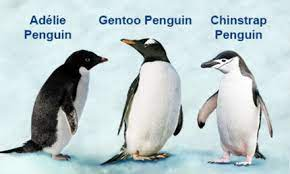

<img src='images/panda.gif' width='300px' align='right' style="padding: 20px">

## Final pandas thoughts...

Learning Pandas can be quite frustrating but with practice (and Google!) it will become straightforward and extremely powerful.

---
<img src='images/download.png' width='80px' align='left'>

**If you would like to <mark>save this notebook</mark> there is a Download button at the top of the page. This will download the `.ipynb`**

If you are not planning to get Anaconda but you want to save the work you've done, got to `File -> Download as` and choose `.html`.

<img src='images/visit-repo.png' width='60px' align='left'>

Alternatively you can click Visit repo at the top to navigate to the github repo where you can download everything as a `.zip` file. 


Full solutions can be found in the [solutions folder](solutions/).